In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
import pyprind
import os
import urllib.request
import urllib.parse
%matplotlib inline

In [2]:
df = pd.read_csv("Tweets.csv")
print("The current shape of dataset is:",  df.shape)
print("\nThe current columns are: \n", df.columns)

The current shape of dataset is: (14640, 15)

The current columns are: 
 Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [3]:
tweets = df[['airline','text','airline_sentiment']]
print("The shape of the dataset is:", tweets.shape)
tweets.head()

The shape of the dataset is: (14640, 3)


,airline,text,airline_sentiment
0,Virgin America,@VirginAmerica What @dhepburn said.,neutral
1,Virgin America,@VirginAmerica plus you've added commercials t...,positive
2,Virgin America,@VirginAmerica I didn't today... Must mean I n...,neutral
3,Virgin America,@VirginAmerica it's really aggressive to blast...,negative
4,Virgin America,@VirginAmerica and it's a really big bad thing...,negative


In [4]:
# info of our features and labels 
print(tweets.info())
print(tweets.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline            14640 non-null  object
 1   text               14640 non-null  object
 2   airline_sentiment  14640 non-null  object
dtypes: object(3)
memory usage: 343.2+ KB
None
       airline            text airline_sentiment
count    14640           14640             14640
unique       6           14427                 3
top     United  @united thanks          negative
freq      3822               6              9178


In [5]:
# check the counts of the different airlines 
print(tweets["airline"].value_counts())

# ckeck if we have any null values 
print(tweets.isnull().sum())

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
airline              0
text                 0
airline_sentiment    0
dtype: int64


In [6]:
# saving the reduced data for future use with 3 cols
tweets.to_csv('airlines_data.csv', index=False, encoding='utf-8')

In [7]:
def clean_txt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove @ sign 
    text = re.sub(r'#', '', text) # remove '#'
    text = re.sub(r'https?:\/\/\S+', '', text) # remove hyper link 
    text = re.sub(r'[^a-zA-Z#]+',' ', text) 
    text = re.sub('[\W]+', ' ', text.lower())
    text = ' '.join([word for word in text.split()
                    if len(word) > 2])
    tokenized = ' '.join([word for word in text.split() 
                    if word not in stop])
    document  = ' '.join([porter.stem(word) 
                    for word in tokenized.split()]) 
    return document

In [8]:
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop = stopwords.words('english')
porter = PorterStemmer()

# check to make sure the function works
clean_txt(tweets.loc[2, 'text'])

'today must mean need take anoth trip'

In [9]:
tweets['text'] = tweets['text'].apply(clean_txt)

<ipython-input-9-f33c7f80c595>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets['text'] = tweets['text'].apply(clean_txt)


In [10]:
tweets.head()

,airline,text,airline_sentiment
0,Virgin America,said,neutral
1,Virgin America,plu ad commerci experi tacki,positive
2,Virgin America,today must mean need take anoth trip,neutral
3,Virgin America,realli aggress blast obnoxi entertain guest fa...,negative
4,Virgin America,realli big bad thing,negative


##  Story telling and Vizualization

- What are the most common words in the entire dataset?
- what are the most common words in the dataset for the negative and positive tweets, respectively. 

In [11]:
from wordcloud import WordCloud

# first convert all words into one list 
all_words = ' '.join([word for word in tweets['text']])
#all_words

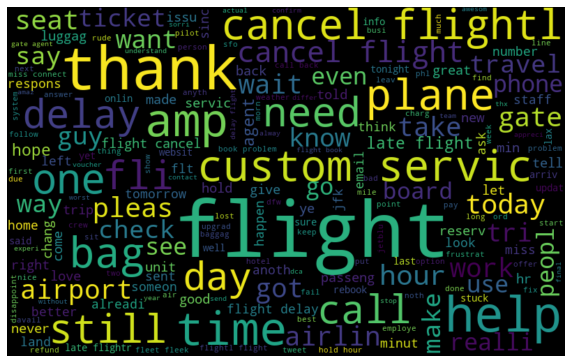

In [12]:
wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(all_words)
plt.figure(figsize= (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

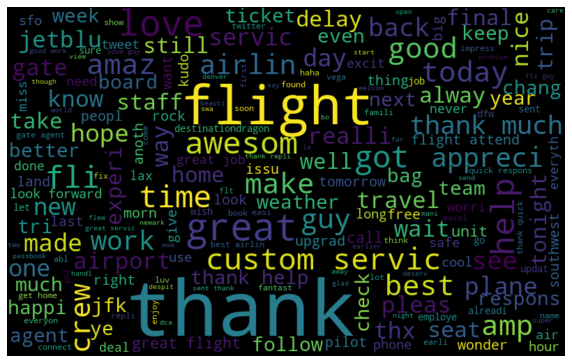

In [13]:
positive_words = ' '.join([word for word in tweets['text'][tweets['airline_sentiment']
                                                            == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(positive_words)
plt.figure(figsize= (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

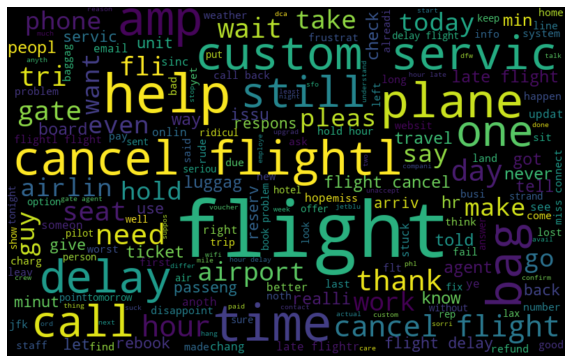

In [14]:
negative_words = ' '.join([word for word in tweets['text'][tweets['airline_sentiment']
                                                            == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(negative_words)
plt.figure(figsize= (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

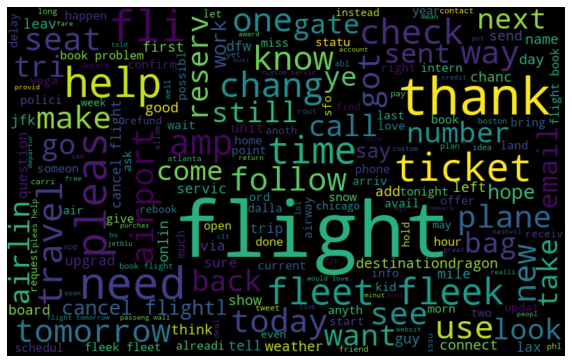

In [15]:
neutral_words = ' '.join([word for word in tweets['text'][tweets['airline_sentiment']
                                                            == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, 
                      max_font_size=110).generate(neutral_words)
plt.figure(figsize= (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [16]:
tweet_two_class = tweets.drop(tweets.loc[tweets['airline_sentiment']=='neutral'].index)
tweets_all_class = tweets

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [18]:
tweets_all_class.head()
tweet_two_class.head()

,airline,text,airline_sentiment
1,Virgin America,plu ad commerci experi tacki,positive
3,Virgin America,realli aggress blast obnoxi entertain guest fa...,negative
4,Virgin America,realli big bad thing,negative
5,Virgin America,serious would pay flight seat play realli bad ...,negative
6,Virgin America,ye nearli everi time fli ear worm away,positive


### All classes

In [19]:
X_all = tweets_all_class.loc[:, 'text']
y_all = tweets_all_class.loc[:, 'airline_sentiment']

In [20]:
label_class_all = {label: index for index, label in 
               enumerate(np.unique(tweets_all_class['airline_sentiment']))}

print(label_class_all)

{'negative': 0, 'neutral': 1, 'positive': 2}


In [21]:
y_all_transform = y_all.map(label_class_all)
y_all_transform

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all_transform, 
                                    train_size=0.80,test_size=0.20, 
                                    random_state=101, stratify = y_all_transform)

In [23]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape) 

(11712,) (2928,)
(11712,) (2928,)


### With 2 classification positive and negative only

In [24]:
X_two = tweet_two_class.loc[:, 'text']
y_two = tweet_two_class.loc[:, 'airline_sentiment']

In [25]:
label_class_two = {label: index for index, label in 
               enumerate(np.unique(tweet_two_class['airline_sentiment']))}

print(label_class_two)

{'negative': 0, 'positive': 1}


In [26]:
y_transform_two = y_two.map(label_class_two)
y_transform_two

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: airline_sentiment, Length: 11541, dtype: int64

In [27]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_transform_two, 
                                    train_size=0.80,test_size=0.20, 
                                    random_state=101, stratify = y_transform_two)

In [28]:
print(X_train_two.shape, X_test_two.shape)
print(y_train_two.shape, y_test_two.shape) 

(9232,) (2309,)
(9232,) (2309,)


# Model 1

## Logistic Regression 

- Grig search using 5 fold and 10 fold cross validation.
- Hyperparameter tuning to optimize model 
- able to train and test on the same data
- Not enough data to split for train, valid and test

In [29]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

def tokenizer(text):
    return text.split()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text]

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 5.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 5.0, 10.0, 100.0]},
              ]


lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])


gs_lr_five_fold = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_lr_ten_fold = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=2,
                           n_jobs=-1)

# With 3 class

### With 5 fold CV

In [51]:
gs_lr_five_fold.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "yo...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',


In [52]:
print(gs_lr_five_fold.best_params_)
gs_lr_five_fold.best_score_

{'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',

0.7823614356480211

In [53]:
optim_clf = gs_lr_five_fold.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test, y_test))

Test Accuracy: 0.783


### with 10 fold CV

In [54]:
gs_lr_ten_fold.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.3min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "y...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',


In [55]:
print(gs_lr_ten_fold.best_params_)
gs_lr_ten_fold.best_score_

{'clf__C': 5.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'mos

0.7848345103365462

In [56]:
optim_clf = gs_lr_ten_fold.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test, y_test))

Test Accuracy: 0.784


## With 2 class 5 fold CV

In [57]:
gs_lr_five_fold.fit(X_train_two, y_train_two)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   35.7s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   58.8s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "yo...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',


In [58]:
print(gs_lr_five_fold.best_params_)
gs_lr_five_fold.best_score_

{'clf__C': 5.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fc715522af0>}


0.9129108078984925

In [60]:
optim_clf = gs_lr_five_fold.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test_two, y_test_two))

Test Accuracy: 0.913


## With 2 class 10 fold CV

In [61]:
gs_lr_ten_fold.fit(X_train_two, y_train_two)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  1.1min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "y...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',


In [62]:
print(gs_lr_ten_fold.best_params_)
gs_lr_ten_fold.best_score_

{'clf__C': 5.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'mos

0.913993752726147

In [63]:
optim_clf = gs_lr_ten_fold.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test_two, y_test_two))

Test Accuracy: 0.914


In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test_two, optim_clf.predict(X_test_two), digits=4))

              precision    recall  f1-score   support

           0     0.9261    0.9690    0.9470      1836
           1     0.8531    0.6998    0.7689       473

    accuracy                         0.9138      2309
   macro avg     0.8896    0.8344    0.8580      2309
weighted avg     0.9111    0.9138    0.9105      2309



# Model 2 Naive Bayes

In [67]:
nb = MultinomialNB()
lr = LogisticRegression()
tf = TfidfVectorizer()

In [68]:
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)


param_grid = [{'vect__ngram_range': [(1, 1), (1, 2)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter]},
              {'vect__ngram_range': [(1, 1), (1, 2)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None]},
              ]


nb_tfidf = Pipeline([('vect', tfidf),
                     ('clf', MultinomialNB(alpha=1.0))])


gs_nb_tfidf_five = GridSearchCV(nb_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

gs_nb_tfidf_ten = GridSearchCV(nb_tfidf, param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=2,
                           n_jobs=-1)

## With 3 classes 5 fold CV

In [69]:
gs_nb_tfidf_five.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   15.9s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1), (1, 2)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself',...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                               

In [71]:
print(gs_nb_tfidf_five.best_params_)
gs_nb_tfidf_five.best_score_

{'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'som

0.7570868838005389

In [72]:
optim_clf = gs_nb_tfidf_five.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test, y_test))

Test Accuracy: 0.766


In [73]:
print(classification_report(y_test, optim_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.7804    0.9406    0.8531      1836
           1     0.6696    0.3694    0.4761       620
           2     0.7721    0.6102    0.6817       472

    accuracy                         0.7664      2928
   macro avg     0.7407    0.6401    0.6703      2928
weighted avg     0.7556    0.7664    0.7456      2928



## With 3 classes 10 fold CV

In [74]:
gs_nb_tfidf_ten.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   23.9s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1), (1, 2)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself'...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                               

In [79]:
print(gs_nb_tfidf_ten.best_params_)
gs_nb_tfidf_ten.best_score_

{'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fc715522af0>, 'vect__use_idf': False}


0.7581946237718703

In [76]:
optim_clf = gs_nb_tfidf_ten.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test, y_test))

Test Accuracy: 0.766


In [77]:
print(classification_report(y_test, optim_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.7804    0.9406    0.8531      1836
           1     0.6686    0.3677    0.4745       620
           2     0.7701    0.6102    0.6809       472

    accuracy                         0.7661      2928
   macro avg     0.7397    0.6395    0.6695      2928
weighted avg     0.7551    0.7661    0.7451      2928



## With 2 class 5 fold CV

In [78]:
gs_nb_tfidf_five.fit(X_train_two, y_train_two)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   10.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1), (1, 2)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself',...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                               

In [80]:
print(gs_nb_tfidf_five.best_params_)
gs_nb_tfidf_five.best_score_

{'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'som

0.9027298521041706

In [81]:
optim_clf = gs_nb_tfidf_five.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test_two, y_test_two))

Test Accuracy: 0.904


In [82]:
print(classification_report(y_test_two, optim_clf.predict(X_test_two), digits=4))

              precision    recall  f1-score   support

           0     0.9164    0.9673    0.9412      1836
           1     0.8383    0.6575    0.7370       473

    accuracy                         0.9039      2309
   macro avg     0.8773    0.8124    0.8391      2309
weighted avg     0.9004    0.9039    0.8993      2309



## With 2 class 10 fold CV

In [85]:
gs_nb_tfidf_ten.fit(X_train_two, y_train_two)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   19.7s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1), (1, 2)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself'...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                               

In [86]:
print(gs_nb_tfidf_ten.best_params_)
gs_nb_tfidf_ten.best_score_

{'vect__ngram_range': (1, 1), 'vect__norm': None, 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'som

0.9050029782424149

In [87]:
optim_clf = gs_nb_tfidf_ten.best_estimator_
print('Test Accuracy: %.3f' % optim_clf.score(X_test_two, y_test_two))

Test Accuracy: 0.904


In [88]:
print(classification_report(y_test_two, optim_clf.predict(X_test_two), digits=4))

              precision    recall  f1-score   support

           0     0.9164    0.9673    0.9412      1836
           1     0.8383    0.6575    0.7370       473

    accuracy                         0.9039      2309
   macro avg     0.8773    0.8124    0.8391      2309
weighted avg     0.9004    0.9039    0.8993      2309



# Model 3 

In [95]:
from sklearn import svm

In [97]:
sv = svm.SVC()

In [98]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [103]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [118]:
param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__C': [1.0, 5.0, 10.0], 
                'clf__gamma': [1, 0.1, 0.01, 0.001]}]


sv_tfidf = Pipeline([('vect', tfidf),
                     ('clf', svm.SVC(kernel='linear'))])


gs_sv_tfidf = GridSearchCV(sv_tfidf, param_grid,
                           scoring='accuracy',
                           cv=10,
                           verbose=2,
                           n_jobs=-1)

# 3 Class

In [113]:
gs_sv_tfidf.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 40.5min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0],
                          'clf__gamma': [1, 0.1, 0.01, 0.001],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her', 'hers',
      

In [114]:
print(gs_sv_tfidf.best_params_)
gs_sv_tfidf.best_score_

{'clf__C': 10.0, 'clf__gamma': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words': ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 

0.7827009673479977

In [116]:
optim_clf = gs_sv_tfidf.best_estimator_
print('Test Accuracy: %.3f' % gs_sv_tfidf.score(X_test, y_test))

Test Accuracy: 0.782


In [117]:
print(classification_report(y_test, optim_clf.predict(X_test), digits=4))

              precision    recall  f1-score   support

           0     0.8188    0.9080    0.8611      1836
           1     0.6400    0.4903    0.5553       620
           2     0.7650    0.6758    0.7177       472

    accuracy                         0.7821      2928
   macro avg     0.7413    0.6914    0.7113      2928
weighted avg     0.7722    0.7821    0.7732      2928



In [119]:
gs_sv_tfidf.fit(X_train_two, y_train_two)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  7.2min finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 5.0, 10.0],
                          'clf__gamma': [1, 0.1, 0.01, 0.001],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'her',

In [120]:
optim_clf = gs_sv_tfidf.best_estimator_
print('Test Accuracy: %.3f' % gs_sv_tfidf.score(X_test_two, y_test_two))

Test Accuracy: 0.913


In [121]:
print(gs_sv_tfidf.best_params_)
gs_sv_tfidf.best_score_

{'clf__C': 1.0, 'clf__gamma': 1, 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x7fc715522af0>}


0.9170269870974096